In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Challenge Description
Company XYZ sells a software for $39. Since revenue has been flat for some time, the VP of
Product has decided to run a test increasing the price. She hopes that this would increase
revenue. In the experiment, 66% of the users have seen the old price ($39), while a random
sample of 33% users a higher price ($59).
The test has been running for some time and the VP of Product is interested in understanding
how it went and whether it would make sense to increase the price for all the users.
Especially he asked you the following questions:
Should the company sell its software for $39 or $59?
The VP of Product is interested in having a holistic view into user behavior, especially
focusing on actionable insights that might increase conversion rate. What are your main
findings looking at the data?
[Bonus] The VP of Product feels that the test has been running for too long and he should
have been able to get statistically significant results in a shorter time. Do you agree with
her intuition?

In [3]:
user = pd.read_csv('user_table.csv')
test = pd.read_csv('test_results.csv')

In [4]:
user.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [5]:
user.describe()

,user_id,lat,long
count,275616.000000,275616.000000,275616.000000
mean,499245.801521,37.111680,-93.981772
std,288533.458944,5.209627,18.086486
min,3.000000,19.700000,-157.800000
25%,249544.500000,33.660000,-112.200000
50%,498861.000000,37.740000,-88.930000
75%,748856.500000,40.700000,-78.910000
max,999999.000000,61.180000,30.310000


In [6]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  275616 non-null  int64  
 1   city     275616 non-null  object 
 2   country  275616 non-null  object 
 3   lat      275616 non-null  float64
 4   long     275616 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [7]:
for col in user.columns:
   print( user[col].value_counts())

user_id
937943    1
607304    1
721633    1
693631    1
64591     1
         ..
939586    1
289769    1
434134    1
89568     1
510335    1
Name: count, Length: 275616, dtype: int64
city
New York       25748
Chicago         7153
Houston         6706
San Antonio     4633
Los Angeles     4141
               ...  
Costa Mesa         1
Cerritos           1
East Lake          1
Ocala              1
New Milford        1
Name: count, Length: 923, dtype: int64
country
USA    275616
Name: count, dtype: int64
lat
40.67    25901
41.84     7478
29.77     6706
29.46     4633
34.11     4475
         ...  
39.30        3
26.45        3
36.53        3
35.12        3
27.98        1
Name: count, Length: 713, dtype: int64
long
-73.94     25748
-87.68      7153
-95.39      6706
-98.51      4633
-118.41     4141
           ...  
-118.07        1
-73.51         1
-82.38         1
-82.13         1
-73.41         1
Name: count, Length: 830, dtype: int64


In [8]:
user.drop_duplicates()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68
...,...,...,...,...,...
275611,485975,Atlanta,USA,33.76,-84.42
275612,35479,Los Angeles,USA,34.11,-118.41
275613,516519,Chicago,USA,41.84,-87.68
275614,984877,Tampa,USA,27.96,-82.48


In [9]:
test.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [10]:
test.describe()

,user_id,test,price,converted
count,316800.000000,316800.000000,316800.000000,316800.000000
mean,499281.341840,0.360079,46.205051,0.018333
std,288591.154044,0.480024,9.601487,0.134154
min,3.000000,0.000000,39.000000,0.000000
25%,249525.750000,0.000000,39.000000,0.000000
50%,499021.500000,0.000000,39.000000,0.000000
75%,749025.500000,1.000000,59.000000,0.000000
max,1000000.000000,1.000000,59.000000,1.000000


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           316800 non-null  int64 
 1   timestamp         316800 non-null  object
 2   source            316800 non-null  object
 3   device            316800 non-null  object
 4   operative_system  316800 non-null  object
 5   test              316800 non-null  int64 
 6   price             316800 non-null  int64 
 7   converted         316800 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 19.3+ MB


In [12]:
data = pd.merge(left=test, right=user, how='left', on='user_id')

In [13]:
data.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [14]:
data[['price', 'test']].groupby(['test', 'price']).count()
###THere is people with test 0 who see price 59 and with test 1 who see price 39
###we should remove them

Empty DataFrame
Columns: []
Index: [(0, 39), (0, 59), (1, 39), (1, 59)]

In [15]:
data = data[((data['test']==0) & (data['price']==39)) | ((data['test']==1) & (data['price']==59))]

In [16]:
data['revenue'] = data['converted'] * data['price']

In [18]:
data.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0


user_id                 0
timestamp               0
source                  0
device                  0
operative_system        0
test                    0
price                   0
converted               0
city                41141
country             41141
lat                 41141
long                41141
revenue                 0
dtype: int64

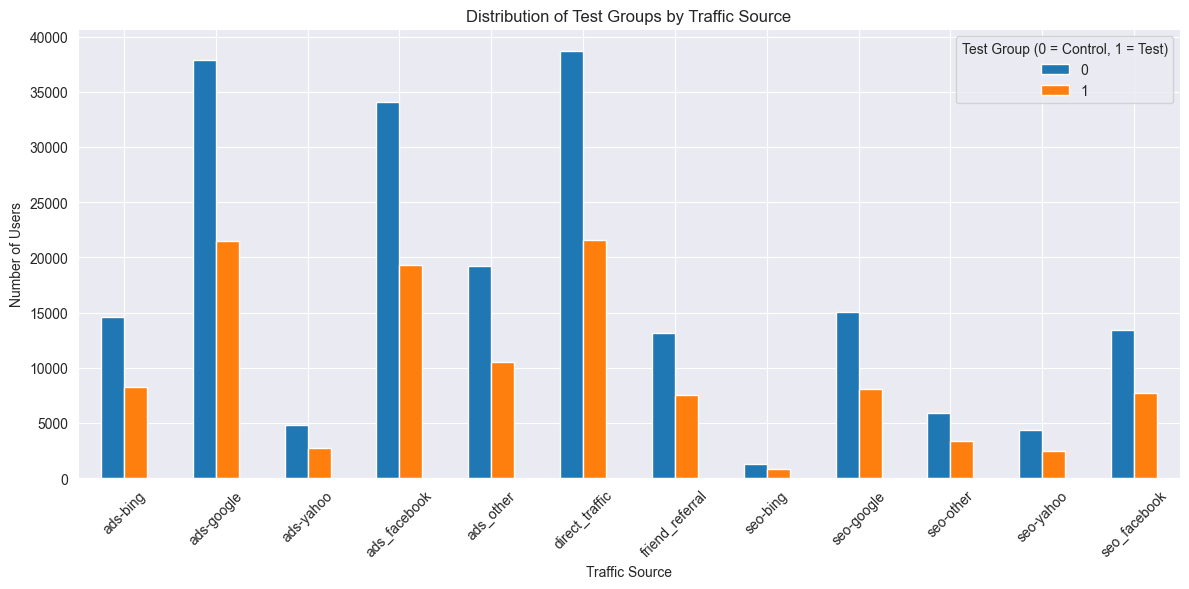

In [20]:
grouped = data.groupby(['source', 'test']).size().unstack(fill_value=0)
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Test Groups by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Test Group (0 = Control, 1 = Test)')
plt.tight_layout()
plt.show()

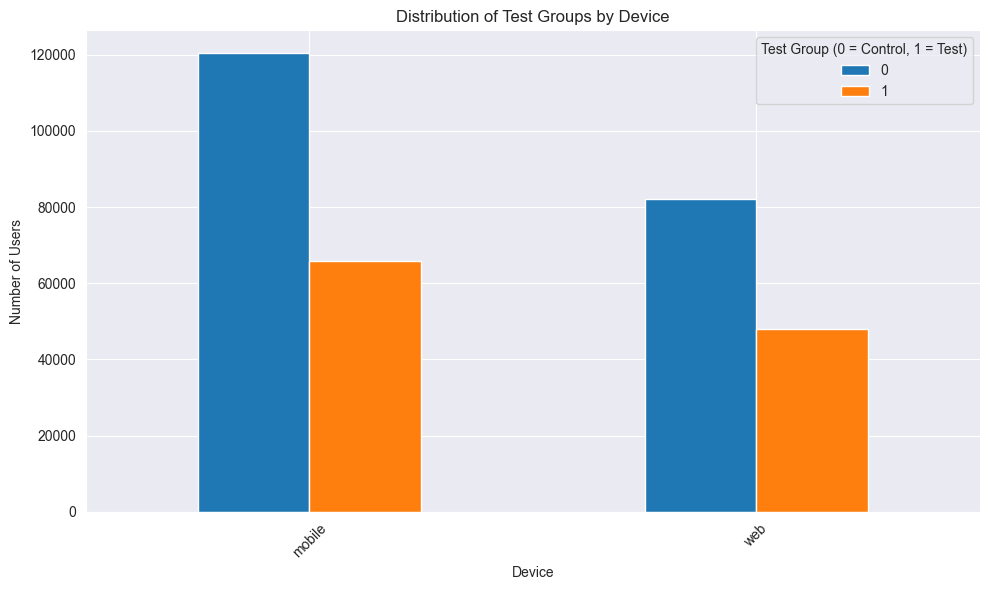

In [21]:
device_grouped = data.groupby(['device', 'test']).size().unstack(fill_value=0)
device_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Test Groups by Device')
plt.xlabel('Device')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Test Group (0 = Control, 1 = Test)')
plt.tight_layout()
plt.show()

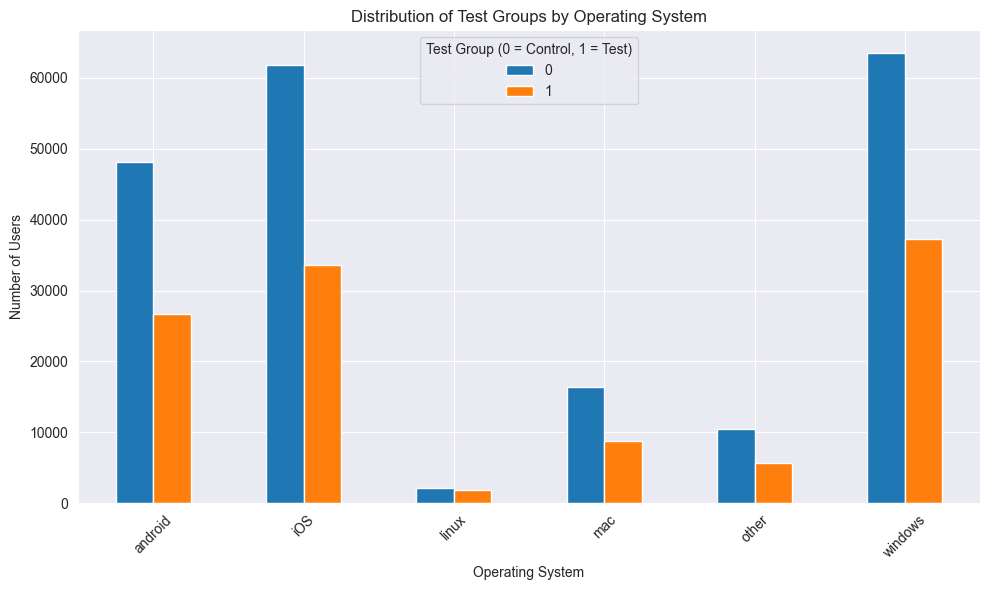

In [23]:
os_grouped = data.groupby(['operative_system', 'test']).size().unstack(fill_value=0)
os_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Test Groups by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Test Group (0 = Control, 1 = Test)')
plt.tight_layout()
plt.show()

In [ ]:
# Group by operating_system and test group
os_grouped = data.groupby(['operating_system', 'test']).size().unstack(fill_value=0)

# Plot
os_grouped.plot(kind='bar', figsize=(10, 6))

plt.title('Distribution of Test Groups by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Test Group (0 = Control, 1 = Test)')
plt.tight_layout()

In [24]:
data[['test', 'converted']].groupby('test').mean()

,converted
test,
0,0.019900
1,0.015555


In [25]:
data[['test', 'revenue']].groupby('test').mean()

,revenue
test,
0,0.776083
1,0.917748


In [26]:
data.groupby('source')['converted'].mean().reset_index()

,source,converted
0,ads-bing,0.012001
1,ads-google,0.021502
2,ads-yahoo,0.014793
3,ads_facebook,0.021198
4,ads_other,0.014350
5,direct_traffic,0.012294
6,friend_referral,0.038688
7,seo-bing,0.023787
8,seo-google,0.016978
9,seo-other,0.015686


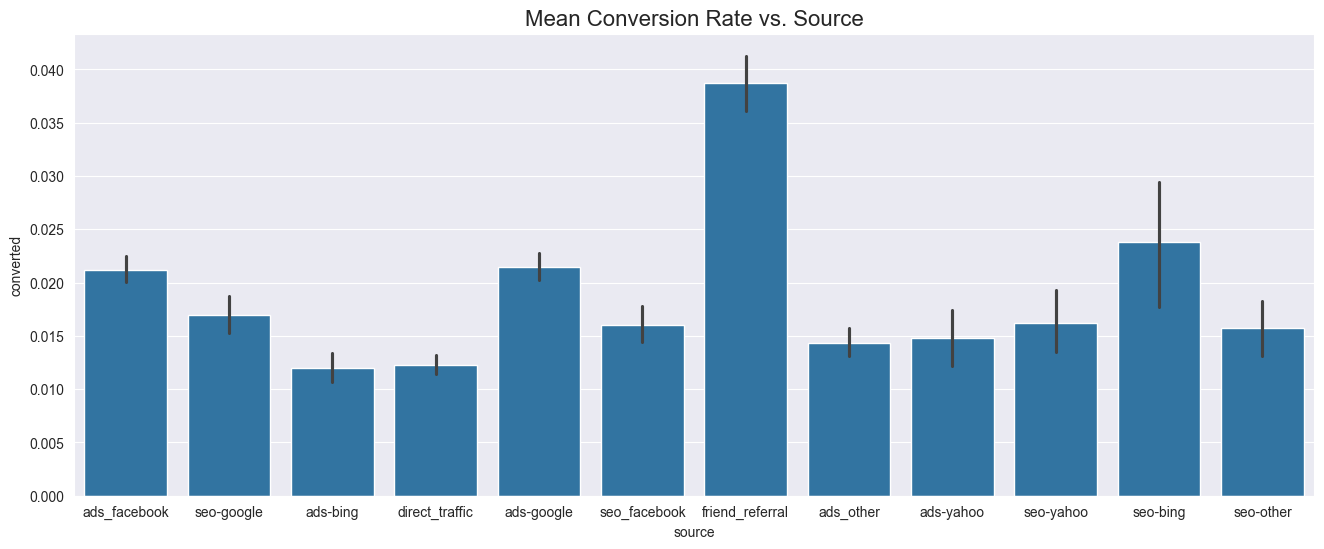

In [27]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='source', y='converted', data=data, ax=ax)
ax.set_title('Mean Conversion Rate vs. Source', fontsize=16)
plt.show()

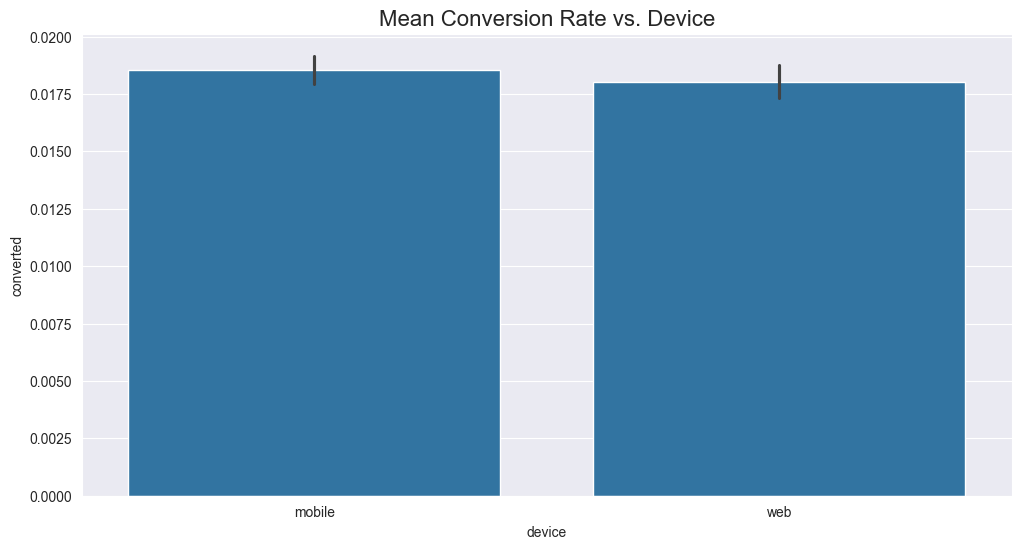

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='device', y='converted', data=data, ax=ax)
ax.set_title('Mean Conversion Rate vs. Device', fontsize=16)
plt.show()

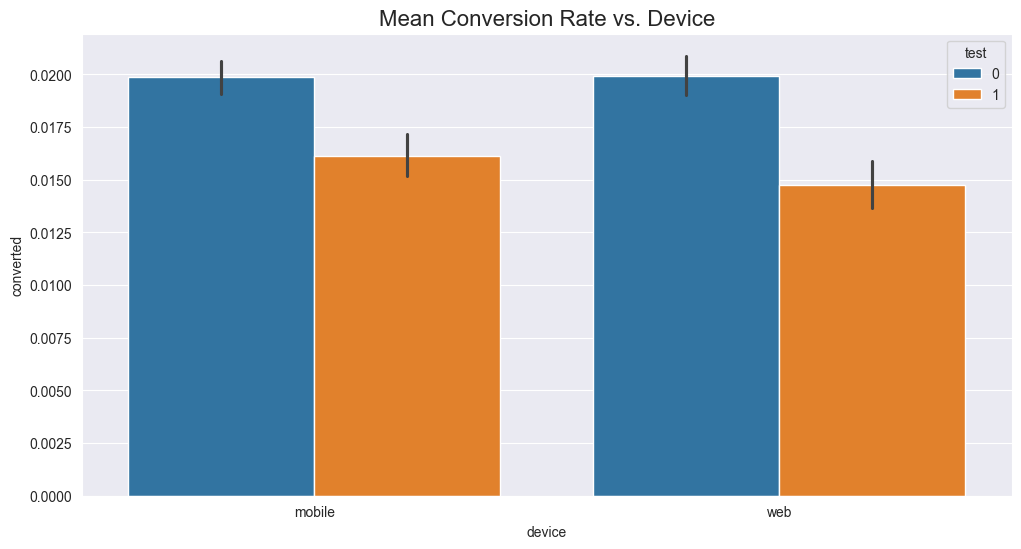

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='device', y='converted', hue='test', data=data, ax=ax)
ax.set_title('Mean Conversion Rate vs. Device', fontsize=16)
plt.show()

In [30]:
data.groupby('operative_system')['converted'].mean().reset_index()

,operative_system,converted
0,android,0.014919
1,iOS,0.022328
2,linux,0.008232
3,mac,0.023987
4,other,0.012981
5,windows,0.016966


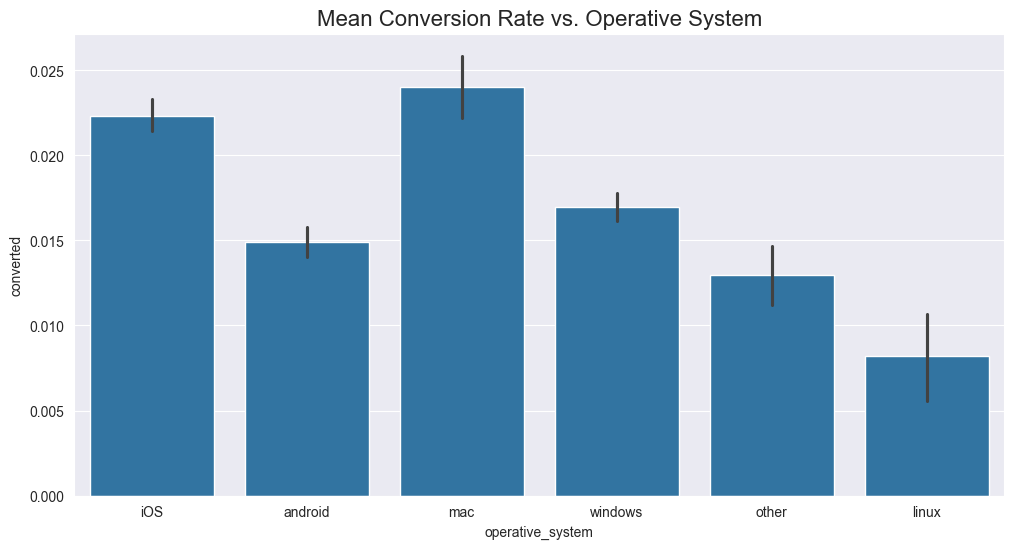

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='operative_system', y='converted', data=data, ax=ax)
ax.set_title('Mean Conversion Rate vs. Operative System', fontsize=16)
plt.show()

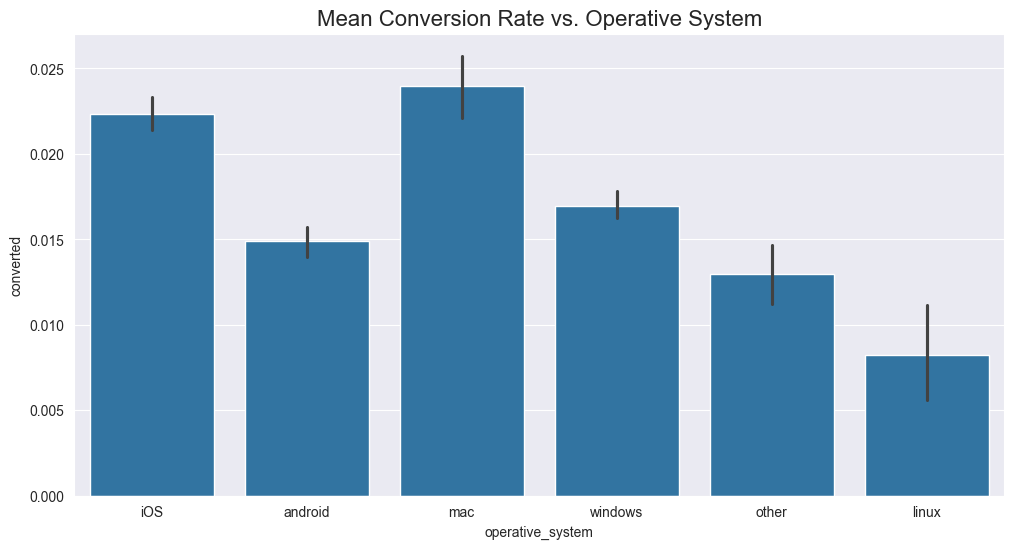

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='operative_system', y='converted', data=data, ax=ax)
ax.set_title('Mean Conversion Rate vs. Operative System', fontsize=16)
plt.show()

From the charts, it's clear that price has a big impact on whether users buy the software — higher prices lead to lower conversion. But other things also matter. Users who came from a friend referral converted much more often, and Apple users (on Mac or iOS) also had a higher conversion rate. Device type didn’t seem to make much difference. Based on this, we recommend offering rewards for referring friends and launching special campaigns targeting Apple users if we decide to raise the price. Also, Linux users convert less, so the tech team should check for any problems or compatibility issues on that platform.